* Name: Ishaan Thanekar
* USCID: 876551769
* Homework 7

## Q.2

#### a)

##### i)
* We will pick 2 pairs of features to look at the data as follows: plot the data projected into x1, x2 space, and also plot the data instead projected into x1, x6 space. For both plots, use 3 different symbols to denote data points belonging to class 1, 2, and 3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df = pd.read_csv('Wine_data_v2.csv')
df.head()

,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1
0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1
1,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1
2,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1
3,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,1
4,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1


In [3]:
data = np.genfromtxt('Wine_data_v2.csv', delimiter=',')
data[0][0] = 1.71
data

array([[ 1.71,  2.43, 15.6 , ...,  1.04,  3.92,  1.  ],
       [ 1.78,  2.14, 11.2 , ...,  1.05,  3.4 ,  1.  ],
       [ 2.36,  2.67, 18.6 , ...,  1.03,  3.17,  1.  ],
       ...,
       [ 4.28,  2.26, 20.  , ...,  0.59,  1.56,  3.  ],
       [ 2.59,  2.37, 20.  , ...,  0.6 ,  1.62,  3.  ],
       [ 4.1 ,  2.74, 24.5 , ...,  0.61,  1.6 ,  3.  ]])

In [4]:
features = data[:,:-1]
labels = data[:,-1]

In [5]:
# standardizing the data as directed:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

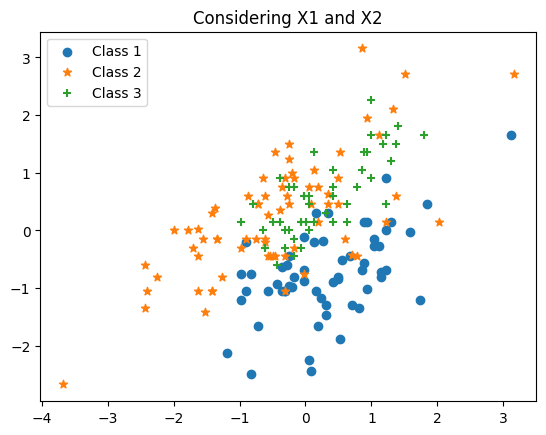

In [6]:
# Plotting data in X1 and X2 space:
# since features start from x0, x1, x2, .......
space1 = features[:, [1, 2]]
plt.scatter(space1[labels == 1][:, 0], space1[labels == 1][:, 1], marker='o', label = 'Class 1')
plt.scatter(space1[labels == 2][:, 0], space1[labels == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(space1[labels == 3][:, 0], space1[labels == 3][:, 1], marker = '+', label = 'Class 3')
plt.title("Considering X1 and X2")
plt.legend()
plt.show()

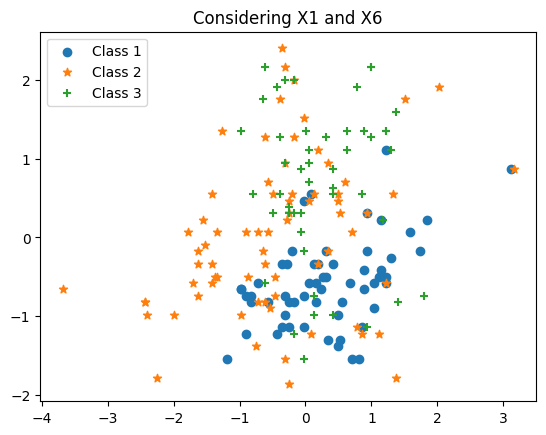

In [7]:
# for feature X1 and X6
space2 = features[:, [1, 6]]
plt.scatter(space2[labels == 1][:, 0], space2[labels == 1][:, 1], marker='o', label = 'Class 1')
plt.scatter(space2[labels == 2][:, 0], space2[labels == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(space2[labels == 3][:, 0], space2[labels == 3][:, 1], marker = '+', label = 'Class 3')
plt.title("Considering X1 and X6")
plt.legend()
plt.show()

##### ii)
* Run a multiclass perceptron classifier on the 2D data using only features x1, x2. For 
each run, first shuffle the data, then use 20-fold cross validation, and compute the 
mean classification error rate over the 20 folds. Also store the weight values from 
the result of the first fold. 

In [8]:
# Note:
"""
Space 1 contains features X1 and X2 and Space 2 contains features X1 and X6
"""

"""
Now we also have to have 2 seperate plots so I will make a helper function for plotting
which I will call within my main model_kfold function for plotting
run with lowest and highest classfication error rate...
"""

def plotting(space, weights, errors, mode):
    """
    This function incorporates logic used in HW 2 and HW 5 which includes flattening 
    the X and Y to get the plot....
    """
    x, y = np.meshgrid(np.arange(space[:, 0].min() - 1, space[:, 0].max() + 1, 0.1),
                                  np.arange(space[:, 1].min() - 1, space[:, 1].max() + 1, 0.1))
    if mode == 'low':
        # for lowest case run for classfication error rate
        result = np.argmin(errors)
    elif mode == 'high':
        # for highest case run for classification error rate
        result = np.argmax(errors)
        
    w = weights[result].predict(space)
    labels = weights[result].predict(np.c_[x.ravel(), y.ravel()])
    labels = labels.reshape(x.shape)
    
    plt.figure()
    plt.title(f'Decision boundary plotted for: {mode}')
    plt.contourf(x, y, labels, cmap = 'viridis', alpha = 0.5)
    plt.scatter(space[:, 0], space[:, 1], c=w, alpha = 1.0)
    plt.show()
    

def model_kfold(space, labels, runs, folds = 20):
    weights, errors = [], []
    for iter in range(runs):
        error_run = []
        space_shuffle, labels_shuffle = shuffle(space, labels)
        kfold = KFold(n_splits=folds)
        
        # just like the previous question we will now do the cross validation loop:
        for x, y in kfold.split(space_shuffle):
            y_train, y_val = labels_shuffle[x], labels_shuffle[y]
            train_X, val_X = space_shuffle[x], space_shuffle[y]
            model = Perceptron()
            model.fit(train_X, y_train)
            preds = model.predict(val_X)
            err_rate = 1 - accuracy_score(preds, y_val)
            error_run.append(err_rate)
            
            # storing weight values from the first fold:
            if len(error_run) == 1:
                weights.append(model)       
        errors.append(np.mean(error_run))
        print(f"Mean Classification error for Run: {iter+1} = {errors[-1]}")
    
    print(f"Average of Mean Classification Error for {folds} folds = {np.mean(errors)}")
    print(f"Standard Deviation of Mean Classification Error for {folds} folds = {np.std(errors)}")
    print("\n---------------------\n")
    # Using plotting:
    print(f"Plotting for the run with the lowest classification error rate for run = {np.argmin(errors)+1}")
    plotting(space, weights, errors, 'low')
    print(f"Plotting for the run with the highest classification error rate for run = {np.argmax(errors)+1}")
    plotting(space, weights, errors, 'high')
    return weights, np.mean(errors), np.std(errors)

* for feature space of X1 and X2

Mean Classification error for Run: 1 = 0.43611111111111117
Mean Classification error for Run: 2 = 0.42847222222222225
Mean Classification error for Run: 3 = 0.38125
Mean Classification error for Run: 4 = 0.3805555555555556
Mean Classification error for Run: 5 = 0.3819444444444444
Average of Mean Classification Error for 20 folds = 0.4016666666666667
Standard Deviation of Mean Classification Error for 20 folds = 0.025125456816681258

---------------------

Plotting for the run with the lowest classification error rate for run = 4


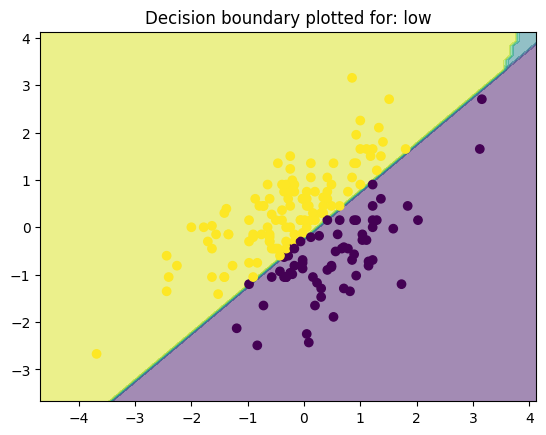

Plotting for the run with the highest classification error rate for run = 1


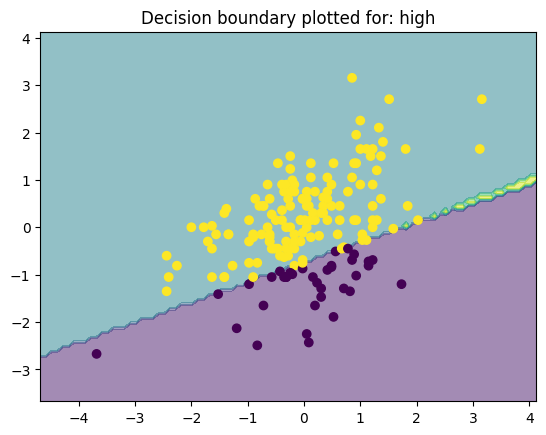

In [9]:
# for X1 and X2
weights1, error1, std1 = model_kfold(space1, labels, runs=5, folds=20)

##### iii)

* for Feature space of X1 and X6

Mean Classification error for Run: 1 = 0.5965277777777778
Mean Classification error for Run: 2 = 0.43819444444444444
Mean Classification error for Run: 3 = 0.5708333333333334
Mean Classification error for Run: 4 = 0.4881944444444445
Mean Classification error for Run: 5 = 0.5145833333333333
Average of Mean Classification Error for 20 folds = 0.5216666666666667
Standard Deviation of Mean Classification Error for 20 folds = 0.05685019300270181

---------------------

Plotting for the run with the lowest classification error rate for run = 2


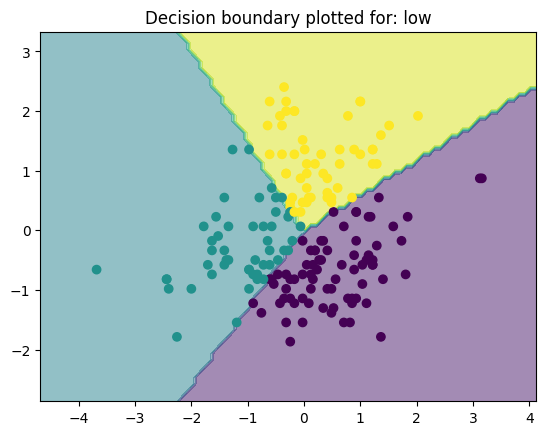

Plotting for the run with the highest classification error rate for run = 1


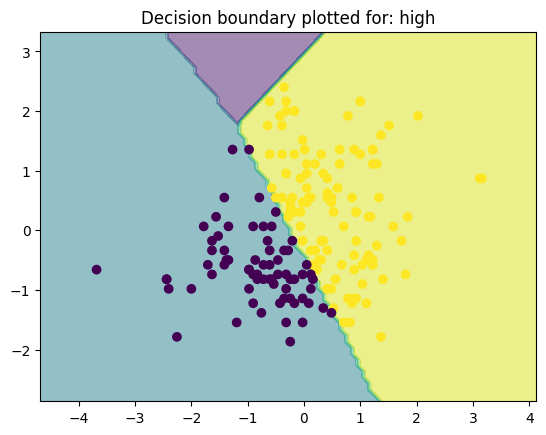

In [10]:
# for X1 and X2
weights2, error2, std2 = model_kfold(space2, labels, runs=5, folds=20)

#### b)
*  PCA based on unnormalized dataset.

##### i)

In [11]:
data = np.genfromtxt('Wine_data_v2.csv', delimiter=',')
data[0][0] = 1.71
new_X, new_y = data[:,:-1], data[:,-1]

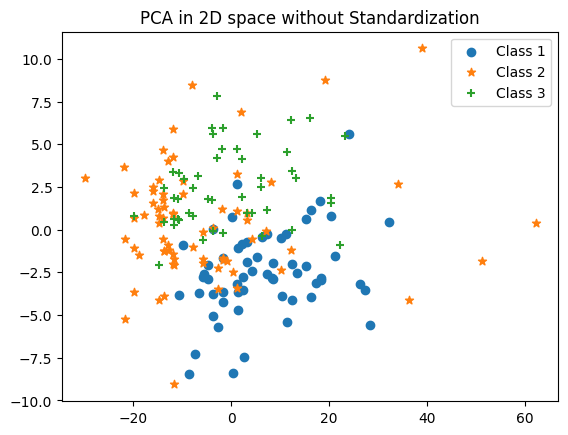

In [12]:
pca_tr = PCA(n_components=2)
train_pca = pca_tr.fit_transform(new_X)

# Plotting like a):
plt.title("PCA in 2D space without Standardization")
plt.scatter(train_pca[new_y == 1][:, 0], train_pca[new_y == 1][:, 1], marker='o', label = 'Class 1')
plt.scatter(train_pca[new_y == 2][:, 0], train_pca[new_y == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(train_pca[new_y == 3][:, 0], train_pca[new_y == 3][:, 1], marker = '+', label = 'Class 3')
plt.legend()
plt.show()

##### ii)

Mean Classification error for Run: 1 = 0.4687500000000001
Mean Classification error for Run: 2 = 0.4444444444444445
Mean Classification error for Run: 3 = 0.4875
Mean Classification error for Run: 4 = 0.49375
Mean Classification error for Run: 5 = 0.45972222222222225
Average of Mean Classification Error for 20 folds = 0.4708333333333334
Standard Deviation of Mean Classification Error for 20 folds = 0.01803952279623962

---------------------

Plotting for the run with the lowest classification error rate for run = 2


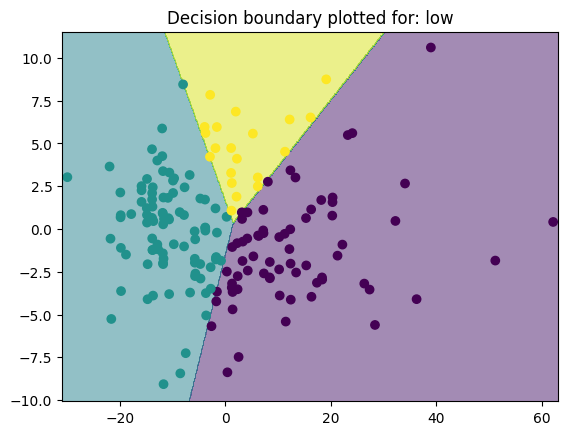

Plotting for the run with the highest classification error rate for run = 4


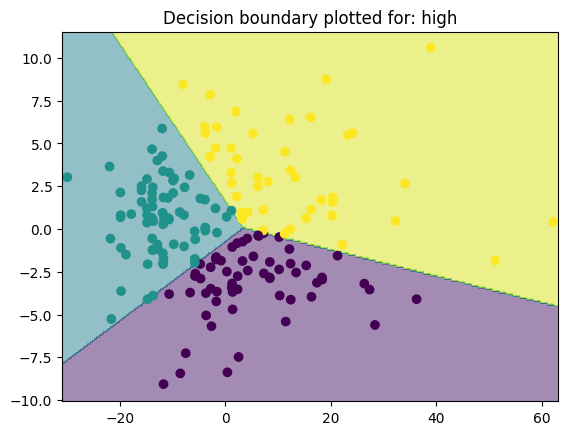

In [13]:
# Now let's just use the functions we created earlier for the a part:
weights3, error3, std3 = model_kfold(train_pca, new_y, runs=5, folds=20)

##### iii) 
*  How does it compare with the baselines in (a)(ii)?

#### c)  
* PCA based on standardized dataset.

##### i)

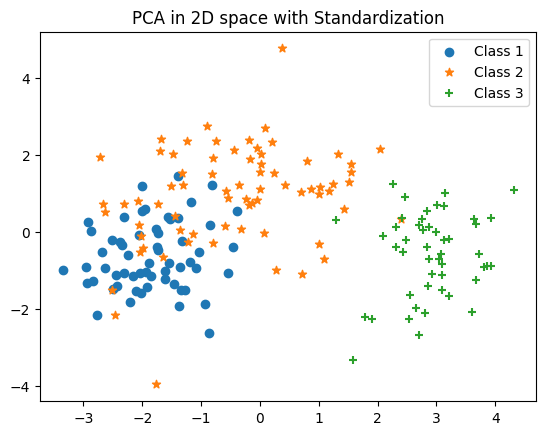

In [14]:
data = np.genfromtxt('Wine_data_v2.csv', delimiter=',')
data[0][0] = 1.71
new_X, new_y = data[:,:-1], data[:,-1]

# Standardizing:
scaler = StandardScaler()
scaler.fit(new_X)
new_X = scaler.transform(new_X)
pca_tr = PCA(n_components=2)
train_pca = pca_tr.fit_transform(new_X)

# Plotting like a):
plt.title("PCA in 2D space with Standardization")
plt.scatter(train_pca[new_y == 1][:, 0], train_pca[new_y == 1][:, 1], marker='o', label = 'Class 1')
plt.scatter(train_pca[new_y == 2][:, 0], train_pca[new_y == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(train_pca[new_y == 3][:, 0], train_pca[new_y == 3][:, 1], marker = '+', label = 'Class 3')
plt.legend()
plt.show()

##### ii)

Mean Classification error for Run: 1 = 0.24305555555555558
Mean Classification error for Run: 2 = 0.15833333333333335
Mean Classification error for Run: 3 = 0.1798611111111111
Mean Classification error for Run: 4 = 0.18055555555555558
Mean Classification error for Run: 5 = 0.17291666666666666
Average of Mean Classification Error for 20 folds = 0.18694444444444444
Standard Deviation of Mean Classification Error for 20 folds = 0.029171295928923688

---------------------

Plotting for the run with the lowest classification error rate for run = 2


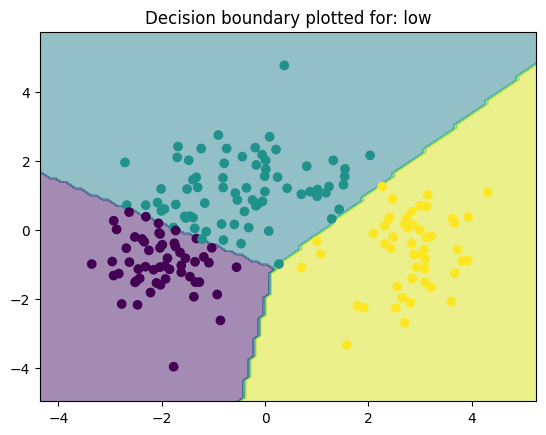

Plotting for the run with the highest classification error rate for run = 1


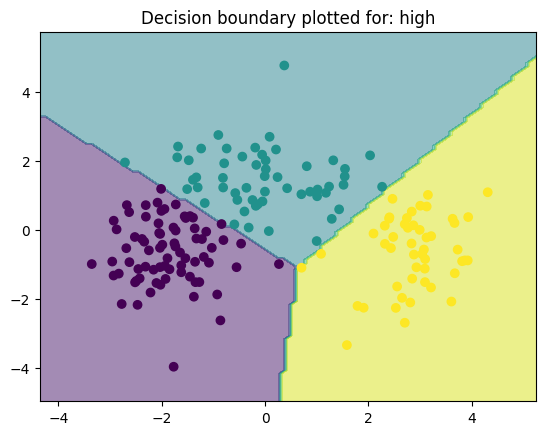

In [15]:
# Now let's just use the functions we created earlier for the a part:
# Standardized:
weights4, error4, std4 = model_kfold(train_pca, new_y, runs=5, folds=20)

##### iii)
*  How does PCA with standardized data compare with PCA using unnormalized data? 
Why?

#### d)
* Multiple Discriminant Analysis (MDA), using LDA as an approximation to MDA

##### i)

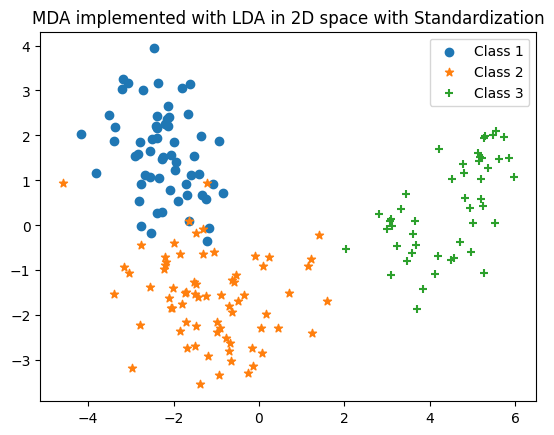

In [16]:
data = np.genfromtxt('Wine_data_v2.csv', delimiter=',')
data[0][0] = 1.71
new_X, new_y = data[:,:-1], data[:,-1]

# First Standardizing the data:
scaler = StandardScaler()
scaler.fit(new_X)
new_X = scaler.transform(new_X)

# Now using LDA:
lda_tr = LDA(n_components=2)
train_lda = lda_tr.fit_transform(new_X, new_y)

# Plotting:
plt.title("MDA implemented with LDA in 2D space with Standardization")
plt.scatter(train_lda[new_y == 1][:, 0], train_lda[new_y == 1][:, 1], marker='o', label = 'Class 1')
plt.scatter(train_lda[new_y == 2][:, 0], train_lda[new_y == 2][:, 1], marker = '*', label = 'Class 2')
plt.scatter(train_lda[new_y == 3][:, 0], train_lda[new_y == 3][:, 1], marker = '+', label = 'Class 3')
plt.legend()
plt.show()

* Answer:

##### ii)
* Repeat with a) (ii)

Mean Classification error for Run: 1 = 0.04583333333333335
Mean Classification error for Run: 2 = 0.056944444444444464
Mean Classification error for Run: 3 = 0.0666666666666667
Mean Classification error for Run: 4 = 0.050694444444444466
Mean Classification error for Run: 5 = 0.061111111111111116
Average of Mean Classification Error for 20 folds = 0.05625000000000002
Standard Deviation of Mean Classification Error for 20 folds = 0.007375510026306531

---------------------

Plotting for the run with the lowest classification error rate for run = 1


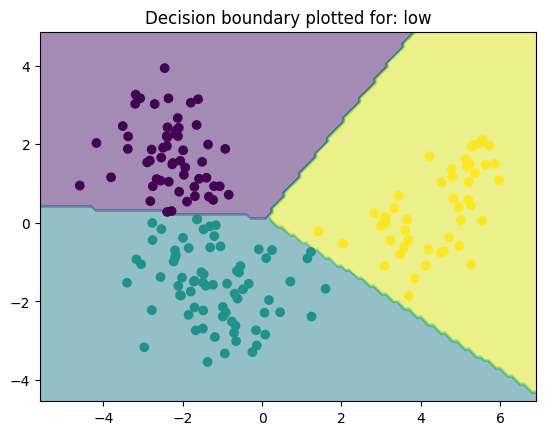

Plotting for the run with the highest classification error rate for run = 3


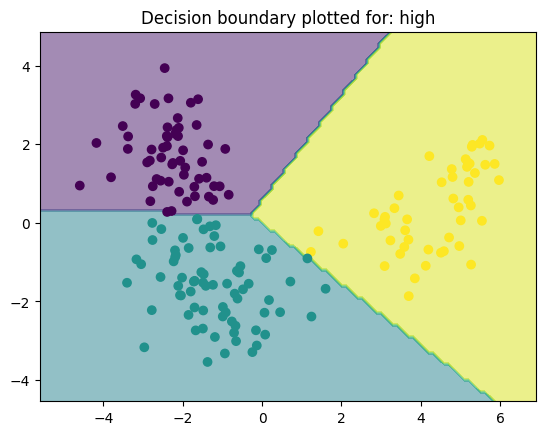

In [17]:
# Now let's just use the functions we created earlier for the a part:
# MDA/ LDA Standardized:
weights5, error5, std5 = model_kfold(train_lda, new_y, runs=5, folds=20)

##### iii)
* How does it compare with the baselines in (a)(ii) and PCA in (b)(ii)?